# Historical Flight Data in Malaysia from October 2018 - November 2018

Author: Nirta Ika Yunita
<br> Date: October 4, 2019

## Load Package

In [1]:
import numpy as np # math calculation
import pandas as pd # data wrangling
import matplotlib.pyplot as plt # plot visualization
import seaborn as sns # visualization
import datetime # package for extract time
import calendar
import warnings
warnings.filterwarnings("ignore")

## Load Dataset

Data that will be used for regression analysis are training_dataset.csv as train data and test_dataset.csv as test data.

In [2]:
train = pd.read_csv('training_dataset.csv')
test = pd.read_csv('test_dataset.csv')

In [3]:
train['flag_train'] = 1
test['flag_train'] = 0

In [4]:
data = train.append(test)

In [5]:
data.head()

,id,number,airline,airline_name,scheduled_departure_time,scheduled_arrival_time,departure_airport_city,departure_airport_code,departure_airport_country,departure_airport_gate,...,arrival_airport_gate,arrival_airport_name,arrival_airport_region,arrival_airport_terminal,arrival_airport_timezone,flight_equipment_iata,flight_equipment_name,flight_duration,delay,flag_train
0,1,AK6430,AK,AirAsia,2018-10-05 22:00:00,2018-10-05 23:05:00,Kuala Lumpur,KUL,MY,J15,...,2,Sultan Ismail Petra Airport,Asia,NaN,Asia/Kuala_Lumpur,32S,Airbus A318 / A319 / A320 / A321,58m,2,1
1,2,ID*7164,ID*,Batik Air,2018-10-05 22:00:00,2018-10-05 23:55:00,Kuala Lumpur,KUL,MY,C33,...,5,Soekarno-Hatta International Airport,Asia,2,Asia/Jakarta,32S,Airbus A318 / A319 / A320 / A321,1h 55m,8,1
2,3,MXD9116,MXD,Malindo Air,2018-10-05 22:00:00,2018-10-05 23:55:00,Kuala Lumpur,KUL,MY,C33,...,5,Soekarno-Hatta International Airport,Asia,2,Asia/Jakarta,32S,Airbus A318 / A319 / A320 / A321,1h 55m,8,1
3,4,AK5198,AK,AirAsia,2018-10-05 22:05:00,2018-10-06 01:00:00,Kuala Lumpur,KUL,MY,J9,...,INT,Sandakan Airport,Asia,NaN,Asia/Kuala_Lumpur,32S,Airbus A318 / A319 / A320 / A321,2h 54m,0,1
4,5,AK516,AK,AirAsia,2018-10-05 22:10:00,2018-10-06 01:25:00,Kuala Lumpur,KUL,MY,P1,...,NaN,Noi Bai International Airport,Asia,T2,Asia/Ho_Chi_Minh,32S,Airbus A318 / A319 / A320 / A321,3h 17m,0,1


In [6]:
data.shape

(152625, 27)

In [7]:
data.dtypes

id                             int64
number                        object
airline                       object
airline_name                  object
scheduled_departure_time      object
scheduled_arrival_time        object
departure_airport_city        object
departure_airport_code        object
departure_airport_country     object
departure_airport_gate        object
departure_airport_name        object
departure_airport_region      object
departure_airport_terminal    object
departure_airport_timezone    object
arrival_airport_city          object
arrival_airport_code          object
arrival_airport_country       object
arrival_airport_gate          object
arrival_airport_name          object
arrival_airport_region        object
arrival_airport_terminal      object
arrival_airport_timezone      object
flight_equipment_iata         object
flight_equipment_name         object
flight_duration               object
delay                          int64
flag_train                     int64
d

In [8]:
data.info()
# please check if the type is suit for our needs

<class 'pandas.core.frame.DataFrame'>
Int64Index: 152625 entries, 0 to 41556
Data columns (total 27 columns):
id                            152625 non-null int64
number                        152625 non-null object
airline                       152625 non-null object
airline_name                  152625 non-null object
scheduled_departure_time      152625 non-null object
scheduled_arrival_time        152618 non-null object
departure_airport_city        152625 non-null object
departure_airport_code        152625 non-null object
departure_airport_country     152625 non-null object
departure_airport_gate        92006 non-null object
departure_airport_name        152625 non-null object
departure_airport_region      152625 non-null object
departure_airport_terminal    96037 non-null object
departure_airport_timezone    152625 non-null object
arrival_airport_city          152625 non-null object
arrival_airport_code          152625 non-null object
arrival_airport_country       152625 non-null

In [9]:
data.describe()

,id,delay,flag_train
count,152625.000000,152625.000000,152625.000000
mean,309153.066051,13.126860,0.727718
std,218781.295975,28.178083,0.445136
min,1.000000,0.000000,0.000000
25%,111971.000000,0.000000,0.000000
50%,296056.000000,2.000000,1.000000
75%,496286.000000,16.000000,1.000000
max,708033.000000,978.000000,1.000000


In [10]:
data.isnull().sum()

id                                 0
number                             0
airline                            0
airline_name                       0
scheduled_departure_time           0
scheduled_arrival_time             7
departure_airport_city             0
departure_airport_code             0
departure_airport_country          0
departure_airport_gate         60619
departure_airport_name             0
departure_airport_region           0
departure_airport_terminal     56588
departure_airport_timezone         0
arrival_airport_city               0
arrival_airport_code               0
arrival_airport_country            0
arrival_airport_gate          137275
arrival_airport_name               0
arrival_airport_region             0
arrival_airport_terminal       79410
arrival_airport_timezone           0
flight_equipment_iata             22
flight_equipment_name             22
flight_duration                    5
delay                              0
flag_train                         0
d

- convert scheduled_departure_time and scheduled_arrival_time to datetime
- categorical features with too much null and unique value must be dropped
- count the scheduled_flight_duration

## Feature Engineering

In [11]:
# from the data (after we check one by one), we decide some features that will be used are:
# - airline_name
# - scheduled_departure_time
# - scheduled_arrival_time
# - departure_airport_name
# - arrival_airport_name
# - delay
# - flag_train

data1 = data[['airline_name', 'scheduled_departure_time', 'scheduled_arrival_time', 'departure_airport_name',
              'arrival_airport_name', 'delay', 'flag_train']].copy()

In [12]:
data1.head()

,airline_name,scheduled_departure_time,scheduled_arrival_time,departure_airport_name,arrival_airport_name,delay,flag_train
0,AirAsia,2018-10-05 22:00:00,2018-10-05 23:05:00,Kuala Lumpur International Airport,Sultan Ismail Petra Airport,2,1
1,Batik Air,2018-10-05 22:00:00,2018-10-05 23:55:00,Kuala Lumpur International Airport,Soekarno-Hatta International Airport,8,1
2,Malindo Air,2018-10-05 22:00:00,2018-10-05 23:55:00,Kuala Lumpur International Airport,Soekarno-Hatta International Airport,8,1
3,AirAsia,2018-10-05 22:05:00,2018-10-06 01:00:00,Kuala Lumpur International Airport,Sandakan Airport,0,1
4,AirAsia,2018-10-05 22:10:00,2018-10-06 01:25:00,Kuala Lumpur International Airport,Noi Bai International Airport,0,1


In [13]:
# convert type of scheduled_departure_time and scheduled_arrival_time to datetime
data1['scheduled_departure_time'] = pd.to_datetime(data1['scheduled_departure_time'])
data1['scheduled_arrival_time'] = pd.to_datetime(data1['scheduled_arrival_time'])

In [14]:
data1.isnull().sum()

airline_name                0
scheduled_departure_time    0
scheduled_arrival_time      7
departure_airport_name      0
arrival_airport_name        0
delay                       0
flag_train                  0
dtype: int64

In [15]:
# clean null
# find rows where 'scheduled_arrival_time' is null as it the only one that has missing values
print(data1[data1['scheduled_arrival_time'].isnull()])

           airline_name scheduled_departure_time scheduled_arrival_time  \
8167     Cathay Pacific      2018-10-09 12:45:00                    NaT   
8168      Cathay Dragon      2018-10-09 12:45:00                    NaT   
38176       Volga-Dnepr      2018-10-25 23:00:00                    NaT   
100795  Air New Zealand      2018-11-26 04:00:00                    NaT   
100798  Air New Zealand      2018-11-26 04:00:00                    NaT   
328     Air New Zealand      2018-12-01 04:00:00                    NaT   
330     Air New Zealand      2018-12-01 04:00:00                    NaT   

                    departure_airport_name  \
8167    Kuala Lumpur International Airport   
8168    Kuala Lumpur International Airport   
38176   Kuala Lumpur International Airport   
100795  Kuala Lumpur International Airport   
100798  Kuala Lumpur International Airport   
328     Kuala Lumpur International Airport   
330     Kuala Lumpur International Airport   

                      arrival_

In [16]:
# drop the missing values
data1 = data1.dropna(axis = 0, how ='any')

In [17]:
# count the scheduled_flight_duration
# perhaps longer flight duration can cause delay
data1['scheduled_flight_duration'] = data1['scheduled_arrival_time'] - data1['scheduled_departure_time']
data1['scheduled_flight_duration_mins'] = data1['scheduled_flight_duration'].dt.components['hours'] * 60 + data1['scheduled_flight_duration'].dt.components['minutes']
data1['scheduled_flight_duration_hours'] = round(data1['scheduled_flight_duration_mins'] / 60, 2)

In [18]:
# # just in case, departure_month will affect delay time. In peak season (like christmas) will delay get longer?
# data1['departure_month'] = data1.scheduled_departure_time.apply(lambda x: x.month)
# data1['departure_month'] = data1['departure_month'].apply(lambda x: calendar.month_abbr[x])

# just in case, departure_day will affect delay time. In weekend will delay get longer?
data1['departure_day'] = data1.scheduled_departure_time.dt.weekday_name
data1['dep_weekend'] = np.where((data1['departure_day'] == 'Saturday') | (data1['departure_day'] == 'Sunday'), 1, 0)

# just in case, departure_hour will affect delay time. We will use this feature for recommendation to passengers
# in day light, will the delay get longer?
data1['departure_hour'] = data1.scheduled_departure_time.apply(lambda x: x.hour)

# # just in case, arrival_month will affect delay time. In peak season (like christmas) will delay get longer?
# data1['arrival_month'] = data1.scheduled_arrival_time.apply(lambda x: x.month)
# data1['arrival_month'] = data1['arrival_month'].apply(lambda x: calendar.month_abbr[x])

# # just in case, arrival_day will affect delay time. In weekend will delay get longer?
# data1['arrival_day'] = data1.scheduled_arrival_time.dt.weekday_name
# data1['arr_weekend'] = np.where((data1['arrival_day'] == 'Saturday') | (data1['arrival_day'] == 'Sunday'), 1, 0)

# # just in case, arrival_hour will affect delay time. Will it affect delay time?
# data1['arrival_hour'] = data1.scheduled_arrival_time.apply(lambda x: x.hour)

data1.head()

,airline_name,scheduled_departure_time,scheduled_arrival_time,departure_airport_name,arrival_airport_name,delay,flag_train,scheduled_flight_duration,scheduled_flight_duration_mins,scheduled_flight_duration_hours,departure_day,dep_weekend,departure_hour
0,AirAsia,2018-10-05 22:00:00,2018-10-05 23:05:00,Kuala Lumpur International Airport,Sultan Ismail Petra Airport,2,1,01:05:00,65,1.08,Friday,0,22
1,Batik Air,2018-10-05 22:00:00,2018-10-05 23:55:00,Kuala Lumpur International Airport,Soekarno-Hatta International Airport,8,1,01:55:00,115,1.92,Friday,0,22
2,Malindo Air,2018-10-05 22:00:00,2018-10-05 23:55:00,Kuala Lumpur International Airport,Soekarno-Hatta International Airport,8,1,01:55:00,115,1.92,Friday,0,22
3,AirAsia,2018-10-05 22:05:00,2018-10-06 01:00:00,Kuala Lumpur International Airport,Sandakan Airport,0,1,02:55:00,175,2.92,Friday,0,22
4,AirAsia,2018-10-05 22:10:00,2018-10-06 01:25:00,Kuala Lumpur International Airport,Noi Bai International Airport,0,1,03:15:00,195,3.25,Friday,0,22


In [19]:
# give flag for delay flight > 0
data1['flag_delay'] = np.where((data1['delay'] > 0), 1, 0)

In [20]:
# group delay based on regulation Permenhub No PM 89 Tahun 2015
def group_delay(delay):
    if delay == 0:
        return 'on time'
    elif delay <= 30:
        return 'delay level 1'
    elif delay <= 60:
        return 'delay level 2'
    elif delay <= 120:
        return 'delay level 3'
    elif delay <= 180:
        return 'delay level 4'
    elif delay <= 240:
        return 'delay level 5'
    else:
        return 'flight cancelled'
    
data1['group_delay'] = data1['delay'].apply(group_delay)

## Data Cleaning

Drop categorical features with too much unique value.

In [21]:
data1 = data1.drop(['scheduled_departure_time', 'scheduled_arrival_time', 'scheduled_flight_duration'], axis=1)

In [22]:
data1.head()

,airline_name,departure_airport_name,arrival_airport_name,delay,flag_train,scheduled_flight_duration_mins,scheduled_flight_duration_hours,departure_day,dep_weekend,departure_hour,flag_delay,group_delay
0,AirAsia,Kuala Lumpur International Airport,Sultan Ismail Petra Airport,2,1,65,1.08,Friday,0,22,1,delay level 1
1,Batik Air,Kuala Lumpur International Airport,Soekarno-Hatta International Airport,8,1,115,1.92,Friday,0,22,1,delay level 1
2,Malindo Air,Kuala Lumpur International Airport,Soekarno-Hatta International Airport,8,1,115,1.92,Friday,0,22,1,delay level 1
3,AirAsia,Kuala Lumpur International Airport,Sandakan Airport,0,1,175,2.92,Friday,0,22,0,on time
4,AirAsia,Kuala Lumpur International Airport,Noi Bai International Airport,0,1,195,3.25,Friday,0,22,0,on time


Drop outliers based on 'delay' variable.

In [23]:
# number of rows and columns before drop outliers
data1.shape

(152618, 12)

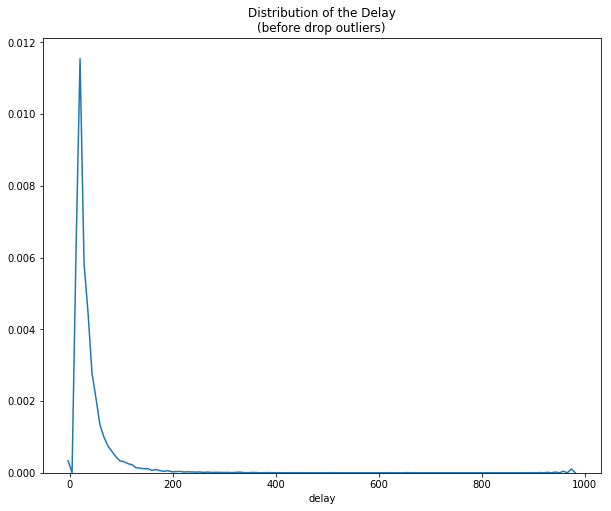

In [24]:
plt.figure(figsize=[10, 8])
sns.distplot(data1['delay'], hist = False)
plt.title('Distribution of the Delay\n(before drop outliers)')
plt.show()

In [25]:
# calculate quartile 1 and quartile 3
q1 = data1['delay'].quantile(0.25)
q3 = data1['delay'].quantile(0.75)

# calculate iqr value
iqr = q3 - q1

# drop outliers
data1 = data1[~(data1['delay'] > (q3 + 6 * iqr))]

In [26]:
# number of rows and columns after drop outliers
data1.shape

(150727, 12)

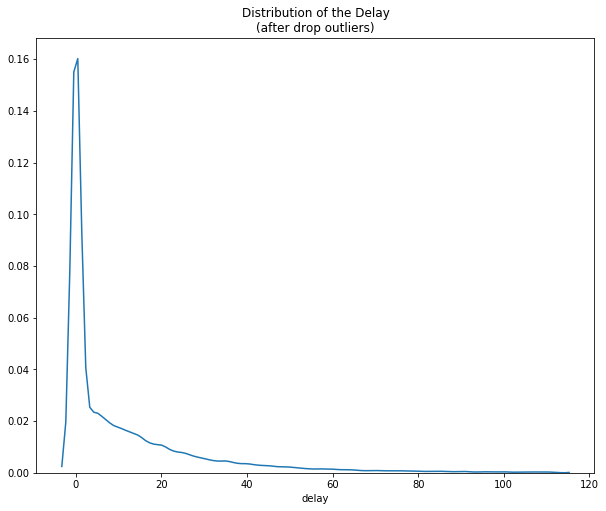

In [27]:
plt.figure(figsize=[10, 8])
sns.distplot(data1['delay'], hist = False)
plt.title('Distribution of the Delay\n(after drop outliers)')
plt.show()

In [28]:
data2 = data1.copy()

# split data2 to dataframe train and test again
train1 = data2[data2['flag_train'] == 1].drop('flag_train', axis=1)
test1 = data2[data2['flag_train'] == 0].drop('flag_train', axis=1)

## Correlation Plot

In [29]:
corr = train1.corr()
corr

,delay,scheduled_flight_duration_mins,scheduled_flight_duration_hours,dep_weekend,departure_hour,flag_delay
delay,1.000000,0.092544,0.092531,-0.022097,-0.011451,0.568264
scheduled_flight_duration_mins,0.092544,1.000000,0.999999,0.001686,0.055976,0.178747
scheduled_flight_duration_hours,0.092531,0.999999,1.000000,0.001687,0.056025,0.178722
dep_weekend,-0.022097,0.001686,0.001687,1.000000,-0.007606,-0.016625
departure_hour,-0.011451,0.055976,0.056025,-0.007606,1.000000,-0.054954
flag_delay,0.568264,0.178747,0.178722,-0.016625,-0.054954,1.000000


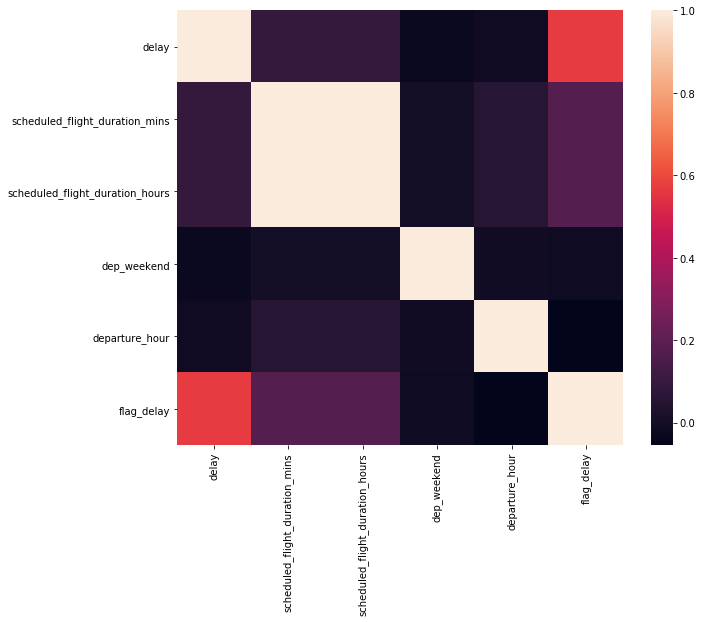

In [30]:
plt.figure(figsize=[10, 8])
sns.heatmap(corr, xticklabels = corr.columns.values, yticklabels = corr.columns.values)

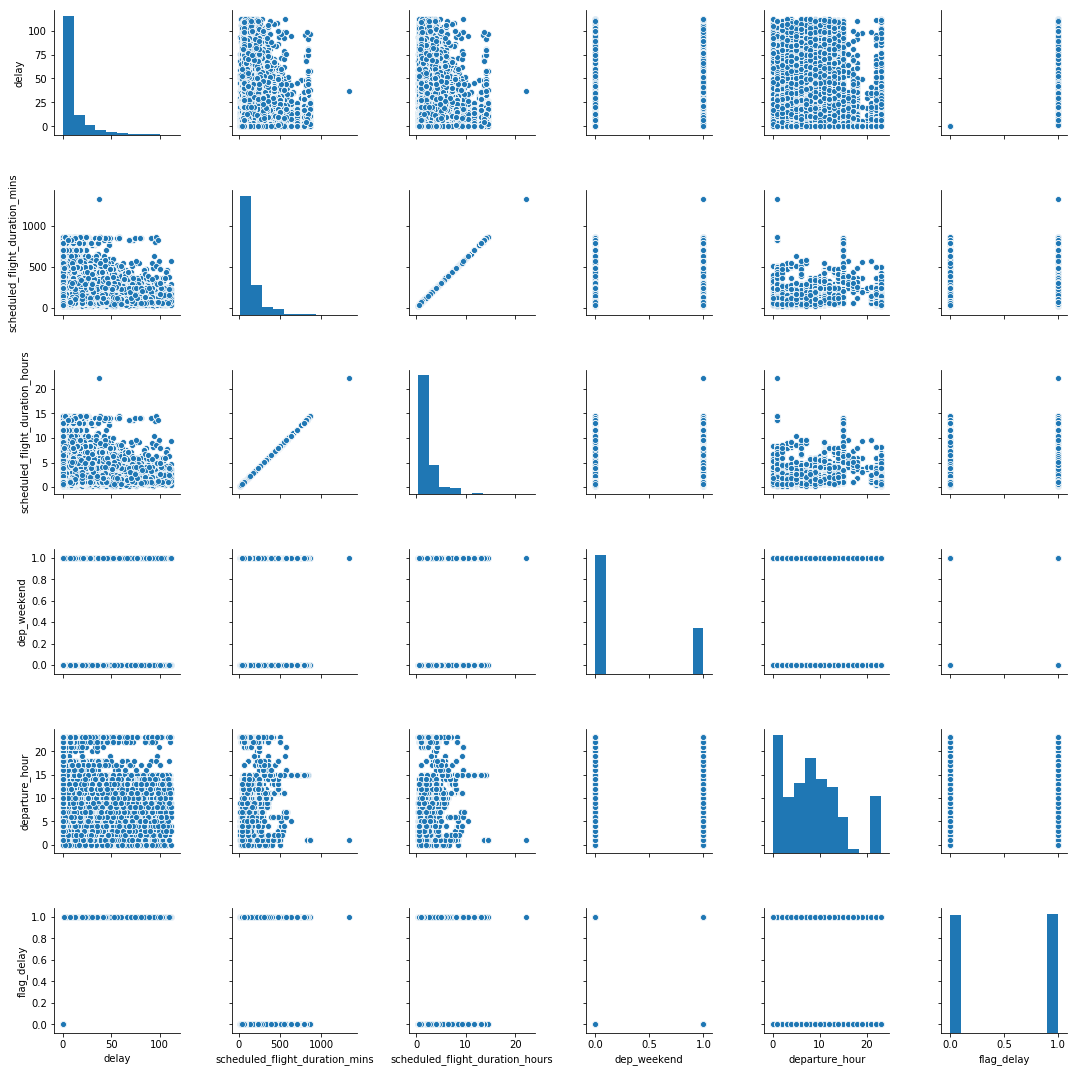

In [31]:
sns.pairplot(train1)

## Recommendation to Passengers

### Best time to take a flight

Best time to take a flight is time where the average of delay is lower than anyother time.

In [32]:
df = train1.copy()
df.head()

,airline_name,departure_airport_name,arrival_airport_name,delay,scheduled_flight_duration_mins,scheduled_flight_duration_hours,departure_day,dep_weekend,departure_hour,flag_delay,group_delay
0,AirAsia,Kuala Lumpur International Airport,Sultan Ismail Petra Airport,2,65,1.08,Friday,0,22,1,delay level 1
1,Batik Air,Kuala Lumpur International Airport,Soekarno-Hatta International Airport,8,115,1.92,Friday,0,22,1,delay level 1
2,Malindo Air,Kuala Lumpur International Airport,Soekarno-Hatta International Airport,8,115,1.92,Friday,0,22,1,delay level 1
3,AirAsia,Kuala Lumpur International Airport,Sandakan Airport,0,175,2.92,Friday,0,22,0,on time
4,AirAsia,Kuala Lumpur International Airport,Noi Bai International Airport,0,195,3.25,Friday,0,22,0,on time


In [33]:
group_time = df[['departure_hour', 'delay']].groupby(by='departure_hour').mean().round(2).sort_values(by =['departure_hour'])

group_time

,delay
departure_hour,
0,7.37
1,8.48
2,6.56
3,9.15
4,8.51
5,8.47
6,8.67
7,9.31
8,10.77


Best 3 time to take a flight with mean delay is lower than any other time are

                delay
departure_hour       
21               1.87
22               2.21
23               4.51


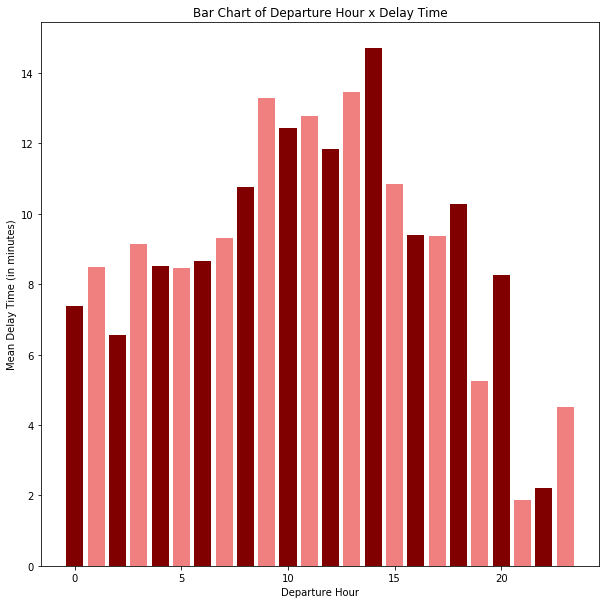

In [34]:
print('Best 3 time to take a flight with mean delay is lower than any other time are\n')
print(group_time.sort_values(by =['delay']).head(3))


# figure size
plt.figure(figsize = (10, 10))

# x-coordinates of bars   
x = group_time.index
  
# y-coordinates of bars 
y = group_time['delay'] 
  
# plotting a bar chart 
plt.bar(x, y, width = 0.8, color = ['maroon', 'lightcoral']) 
  
# naming the x-axis 
plt.xlabel('Departure Hour') 
# naming the y-axis 
plt.ylabel('Mean Delay Time (in minutes)') 
# plot title 
plt.title('Bar Chart of Departure Hour x Delay Time') 

# function to show the plot 
plt.show() 

### Best airline to take a flight

Best airline to take a flight is where the average of delay is lowest.

In [35]:
df = train1.copy()
df.head()

,airline_name,departure_airport_name,arrival_airport_name,delay,scheduled_flight_duration_mins,scheduled_flight_duration_hours,departure_day,dep_weekend,departure_hour,flag_delay,group_delay
0,AirAsia,Kuala Lumpur International Airport,Sultan Ismail Petra Airport,2,65,1.08,Friday,0,22,1,delay level 1
1,Batik Air,Kuala Lumpur International Airport,Soekarno-Hatta International Airport,8,115,1.92,Friday,0,22,1,delay level 1
2,Malindo Air,Kuala Lumpur International Airport,Soekarno-Hatta International Airport,8,115,1.92,Friday,0,22,1,delay level 1
3,AirAsia,Kuala Lumpur International Airport,Sandakan Airport,0,175,2.92,Friday,0,22,0,on time
4,AirAsia,Kuala Lumpur International Airport,Noi Bai International Airport,0,195,3.25,Friday,0,22,0,on time


In [36]:
group_airline = df[['airline_name', 'delay']].groupby(by='airline_name').mean().round(2).sort_values(by =['airline_name'])

group_airline

,delay
airline_name,
AHK,9.00
ANA,5.82
Air Astana,10.79
Air Canada,6.99
Air China,19.60
...,...
Virgin Australia,15.07
Wings Air (Indonesia),9.12
Xiamen Airlines,11.03


Best airlines with 0 delay time to take a flight are

                             delay
airline_name                      
Firefly                        0.0
Guangxi Beibu Gulf Airlines    0.0
Hong Kong Airlines             0.0
Silk Way West                  0.0
YTO Cargo                      0.0


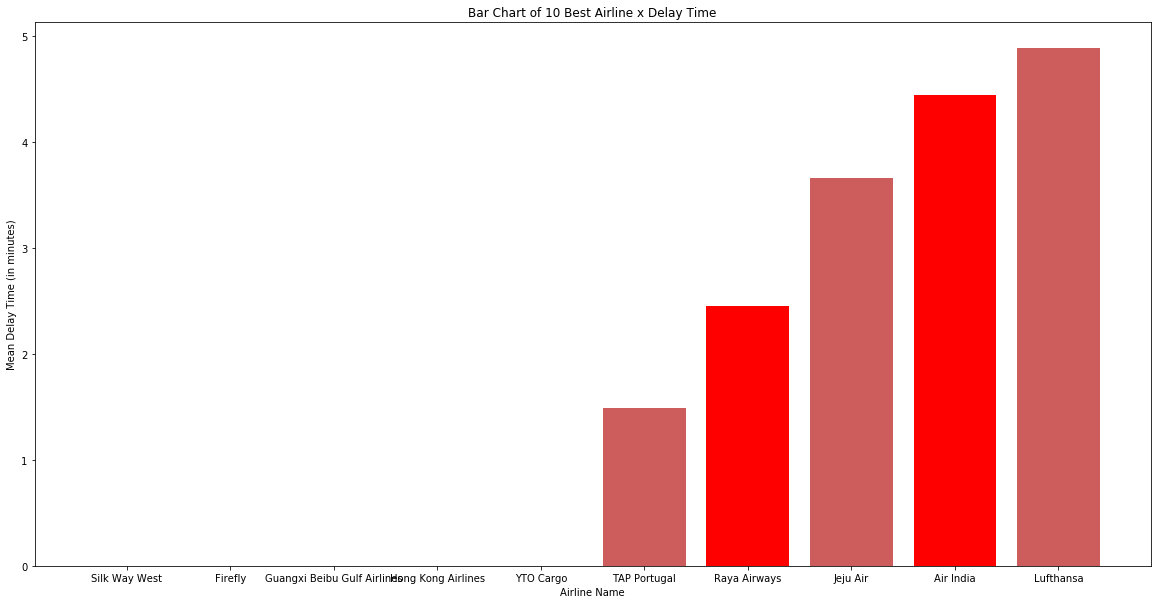

In [37]:
print('Best airlines with 0 delay time to take a flight are\n')
print(group_airline[group_airline.delay == 0])

best_airline = group_airline.sort_values(by =['delay']).head(10)

# figure size
plt.figure(figsize = (20, 10))

# x-coordinates of bars   
x = best_airline.index
  
# y-coordinates of bars 
y = best_airline['delay'] 
  
# plotting a bar chart 
plt.bar(x, y, width = 0.8, color = ['red', 'indianred']) 
  
# naming the x-axis 
plt.xlabel('Airline Name') 
# naming the y-axis 
plt.ylabel('Mean Delay Time (in minutes)') 
# plot title 
plt.title('Bar Chart of 10 Best Airline x Delay Time') 

# function to show the plot 
plt.show() 

### Best time and best airline to take a flight

In [38]:
df = train1.copy()
df.head()

,airline_name,departure_airport_name,arrival_airport_name,delay,scheduled_flight_duration_mins,scheduled_flight_duration_hours,departure_day,dep_weekend,departure_hour,flag_delay,group_delay
0,AirAsia,Kuala Lumpur International Airport,Sultan Ismail Petra Airport,2,65,1.08,Friday,0,22,1,delay level 1
1,Batik Air,Kuala Lumpur International Airport,Soekarno-Hatta International Airport,8,115,1.92,Friday,0,22,1,delay level 1
2,Malindo Air,Kuala Lumpur International Airport,Soekarno-Hatta International Airport,8,115,1.92,Friday,0,22,1,delay level 1
3,AirAsia,Kuala Lumpur International Airport,Sandakan Airport,0,175,2.92,Friday,0,22,0,on time
4,AirAsia,Kuala Lumpur International Airport,Noi Bai International Airport,0,195,3.25,Friday,0,22,0,on time


In [39]:
group_time_airline = df[['departure_hour', 'airline_name', 'delay']]
group_time_airline = group_time_airline.groupby(['departure_hour', 'airline_name']).mean().round(2).sort_values(by =['departure_hour', 'airline_name'])

group_time_airline

delay
departure_hour airline_name             
0              ANA                  5.85
               Air Canada           6.99
               Air India            3.12
               Air New Zealand     14.42
               AirAsia              4.51
...                                  ...
23             SilkAir             12.13
               Singapore Airlines  12.13
               United Airlines      3.96
               Virgin Australia    12.13
               Xiamen Airlines      6.71

[675 rows x 1 columns]

In [40]:
print('Best airlines with minimum mean delay time to take a flight per hour are listed below:')

time = []
planes = []
delays = []

for i in range(24):
    time.append(i)
    
    plane = group_time_airline.loc[i].idxmin()["delay"]
    planes.append(plane)
    
    delay = group_time_airline.loc[i].min()["delay"]
    delays.append(delay)
    
    
pd.DataFrame({"departure_hour": time, "airline_name": planes, "mean delay in minute(s)": delays})

Best airlines with minimum mean delay time to take a flight per hour are listed below:


,departure_hour,airline_name,mean delay in minute(s)
0,0,Firefly,0.00
1,1,Firefly,0.00
2,2,Firefly,0.00
3,3,Firefly,0.00
4,4,Firefly,0.00
5,5,Firefly,0.00
6,6,Firefly,0.00
7,7,Firefly,0.00
8,8,Firefly,0.00
9,9,Firefly,0.00


### Weekend vs Weekday

In [41]:
df = train1.copy()
df.head()

,airline_name,departure_airport_name,arrival_airport_name,delay,scheduled_flight_duration_mins,scheduled_flight_duration_hours,departure_day,dep_weekend,departure_hour,flag_delay,group_delay
0,AirAsia,Kuala Lumpur International Airport,Sultan Ismail Petra Airport,2,65,1.08,Friday,0,22,1,delay level 1
1,Batik Air,Kuala Lumpur International Airport,Soekarno-Hatta International Airport,8,115,1.92,Friday,0,22,1,delay level 1
2,Malindo Air,Kuala Lumpur International Airport,Soekarno-Hatta International Airport,8,115,1.92,Friday,0,22,1,delay level 1
3,AirAsia,Kuala Lumpur International Airport,Sandakan Airport,0,175,2.92,Friday,0,22,0,on time
4,AirAsia,Kuala Lumpur International Airport,Noi Bai International Airport,0,195,3.25,Friday,0,22,0,on time


In [42]:
week_delay = df[['dep_weekend', 'flag_delay', 'airline_name']]
week_delay = week_delay.groupby(['dep_weekend', 'flag_delay']).count()
week_delay['percentage'] = week_delay / week_delay.groupby(level = 0).sum()

week_delay

airline_name  percentage
dep_weekend flag_delay                          
0           0                  39149    0.493415
            1                  40194    0.506585
1           0                  15599    0.511980
            1                  14869    0.488020

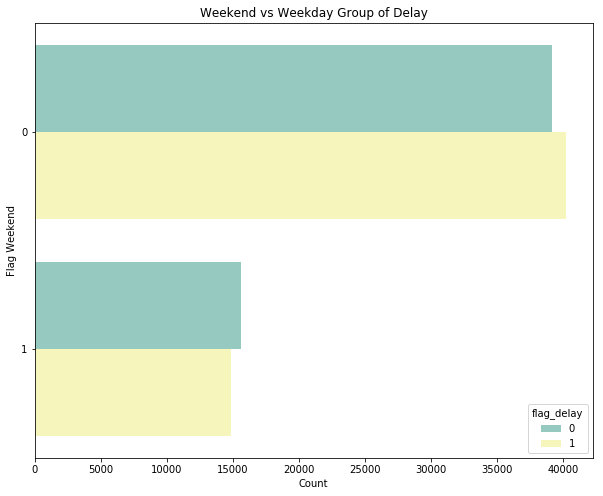

In [43]:
fig = plt.figure(1, figsize=(10, 8))
ax = sns.countplot(y='dep_weekend', hue='flag_delay', palette= 'Set3', data = df)
# naming the x-axis 
plt.xlabel('Count') 
# naming the y-axis 
plt.ylabel('Flag Weekend') 
# plot title 
plt.title('Weekend vs Weekday Group of Delay') 
plt.show()

In [44]:
week_delay = df[['dep_weekend', 'group_delay', 'airline_name']]
week_delay = week_delay.groupby(['dep_weekend', 'group_delay']).count()
week_delay['percentage'] = week_delay / week_delay.groupby(level = 0).sum()
week_delay

airline_name  percentage
dep_weekend group_delay                            
0           delay level 1         32300    0.407093
            delay level 2          5825    0.073415
            delay level 3          2069    0.026077
            on time               39149    0.493415
1           delay level 1         12222    0.401142
            delay level 2          1990    0.065314
            delay level 3           657    0.021564
            on time               15599    0.511980

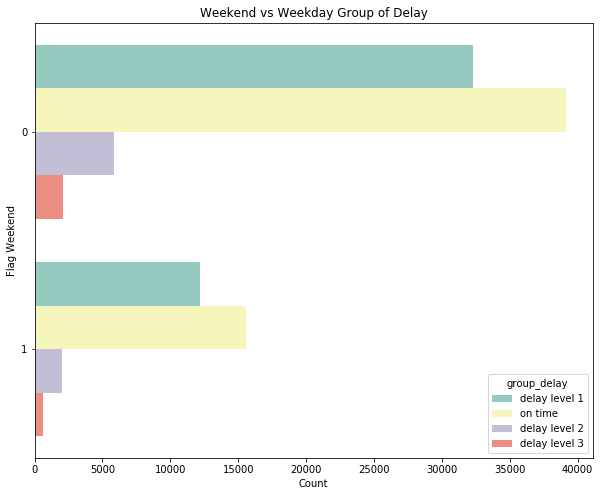

In [45]:
fig = plt.figure(1, figsize=(10, 8))
ax = sns.countplot(y='dep_weekend', hue='group_delay', palette= 'Set3', data = df)
# naming the x-axis 
plt.xlabel('Count') 
# naming the y-axis 
plt.ylabel('Flag Weekend') 
# plot title 
plt.title('Weekend vs Weekday Group of Delay') 
plt.show()

We can see that the delay is not affected by weekday or weekend as the percentage is almost similar.

## Multivariate Regression

A model to estimate the delay duration.

In [46]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import statsmodels.api as sm

In [47]:
mul_reg_train = train1.copy()
mul_reg_test = test1.copy()

In [48]:
target_train = mul_reg_train['delay']
temp_train = mul_reg_train.drop(['delay', 'flag_delay', 'group_delay'], axis = 1)

target_test = mul_reg_test['delay']
temp_test= mul_reg_test.drop(['delay', 'flag_delay', 'group_delay'], axis = 1)

In [49]:
X_train = pd.get_dummies(temp_train, dummy_na = True, drop_first = True)
y_train = target_train

X_test = pd.get_dummies(temp_test, dummy_na = True, drop_first = True)
y_test = target_test

# get missing columns in the training test
miss_cols = set(X_train.columns) - set(X_test.columns )

# add a missing column in test set with default value equal to 0
for col in miss_cols:
    X_test[col] = 0
    
# ensure the order of column in the test set is in the same order than in train set
X_test = X_test[X_train.columns]

In [50]:
multi_regression = LinearRegression()
multi_regression.fit(X_train, y_train)

# y_pred_train = multi_regression.predict(X_train)
y_pred_test = multi_regression.predict(X_test)

In [51]:
print('Mean Squared Error: ', round(mean_squared_error(y_test, y_pred_test), 4))
print('Mean Absolute Error: ', round(mean_absolute_error(y_test, y_pred_test), 4))

Mean Squared Error:  393.5664
Mean Absolute Error:  12.5433


In [52]:
result = sm.OLS(y_train, X_train).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  delay   R-squared:                       0.336
Model:                            OLS   Adj. R-squared:                  0.334
Method:                 Least Squares   F-statistic:                     205.4
Date:                Thu, 14 Nov 2019   Prob (F-statistic):               0.00
Time:                        17:20:57   Log-Likelihood:            -4.5864e+05
No. Observations:              109811   AIC:                         9.178e+05
Df Residuals:                  109541   BIC:                         9.204e+05
Df Model:                         270                                         
Covariance Type:            nonrobust                                         
                                                                               coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------

## Logistic Regression

A model to predict delay > 60 min.

In [53]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import auc, confusion_matrix, roc_auc_score, classification_report, roc_curve, accuracy_score
from sklearn import metrics

In [54]:
log_reg_train = train1.copy()
log_reg_test = test1.copy()

In [55]:
target_train = log_reg_train['delay'].apply(lambda x: 1 if x > 60 else 0)
temp_train = log_reg_train.drop(['delay', 'flag_delay', 'group_delay'], axis = 1)

target_test = log_reg_test['delay'].apply(lambda x: 1 if x > 60 else 0)
temp_test= log_reg_test.drop(['delay', 'flag_delay', 'group_delay'], axis = 1)

In [56]:
X_train = pd.get_dummies(temp_train, dummy_na = True, drop_first = True)
y_train = target_train

X_test = pd.get_dummies(temp_test, dummy_na = True, drop_first = True)
y_test = target_test

# get missing columns in the training test
miss_cols = set(X_train.columns) - set(X_test.columns )

# add a missing column in test set with default value equal to 0
for col in miss_cols:
    X_test[col] = 0
    
# ensure the order of column in the test set is in the same order than in train set
X_test = X_test[X_train.columns]

In [57]:
SC = StandardScaler()

X_train = SC.fit_transform(X_train)
X_test = SC.fit_transform(X_test)

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

y_pred_train = log_reg.predict(X_train)
y_pred_test = log_reg.predict(X_test) 

In [58]:
cm_train = confusion_matrix(y_train, y_pred_train)
print(cm_train)

[[107085      0]
 [  2725      1]]


In [59]:
cm_test = confusion_matrix(y_test, y_pred_test)
print(cm_test)

[[39123     1]
 [ 1792     0]]


In [60]:
fpr_train, tpr_train, threshold = metrics.roc_curve(y_train, y_pred_train)
fpr_test, tpr_test, threshold = metrics.roc_curve(y_test, y_pred_test)

report_train = classification_report(y_train, y_pred_train)
report_test = classification_report(y_test, y_pred_test)

In [61]:
score = accuracy_score(y_test, y_pred_test)
print('Accuracy = ', round(score, 4))

Accuracy =  0.9562


In [62]:
print('AUC train = {}'.format(metrics.auc(fpr_train, tpr_train)))
print(report_train)

print()
print()

print('AUC test = {}'.format(metrics.auc(fpr_test, tpr_test)))
print(report_test)

AUC train = 0.5001834189288334
              precision    recall  f1-score   support

           0       0.98      1.00      0.99    107085
           1       1.00      0.00      0.00      2726

   micro avg       0.98      0.98      0.98    109811
   macro avg       0.99      0.50      0.49    109811
weighted avg       0.98      0.98      0.96    109811



AUC test = 0.49998722012064206
              precision    recall  f1-score   support

           0       0.96      1.00      0.98     39124
           1       0.00      0.00      0.00      1792

   micro avg       0.96      0.96      0.96     40916
   macro avg       0.48      0.50      0.49     40916
weighted avg       0.91      0.96      0.93     40916



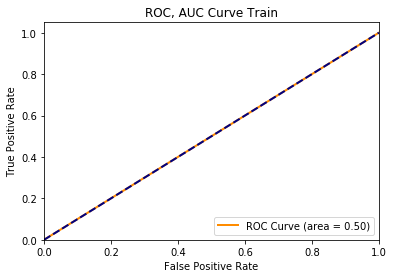

In [63]:
plt.figure()
lw = 2
plt.plot(fpr_train, tpr_train, color = 'darkorange',
        lw = lw, label = 'ROC Curve (area = %0.2f)' %metrics.auc(fpr_train, tpr_train))
plt.plot([0,1], [0,1], color = 'navy',lw = lw, linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC, AUC Curve Train')
plt.legend(loc = 'lower right')
plt.show()

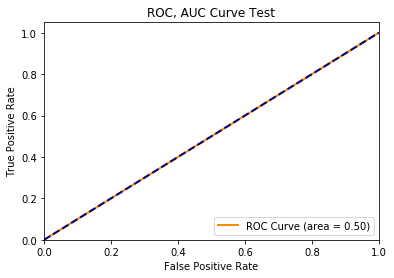

In [64]:
plt.figure()
lw = 2
plt.plot(fpr_test, tpr_test, color = 'darkorange',
        lw = lw, label = 'ROC Curve (area = %0.2f)' %metrics.auc(fpr_test, tpr_test))
plt.plot([0,1], [0,1], color = 'navy', lw = lw, linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC, AUC Curve Test')
plt.legend(loc = 'lower right')
plt.show()

## Decision Tree

A model to predict delay > 60 min.

In [65]:
from sklearn.tree import DecisionTreeClassifier

In [66]:
dec_tree_train = train1.copy()
dec_tree_test = test1.copy()

In [67]:
target_train = dec_tree_train['delay'].apply(lambda x: 1 if x > 60 else 0)
temp_train = dec_tree_train.drop(['delay', 'flag_delay', 'group_delay'], axis = 1)

target_test = dec_tree_test['delay'].apply(lambda x: 1 if x > 60 else 0)
temp_test= dec_tree_test.drop(['delay', 'flag_delay', 'group_delay'], axis = 1)

In [68]:
X_train = pd.get_dummies(temp_train, dummy_na = True, drop_first = True)
y_train = target_train

X_test = pd.get_dummies(temp_test, dummy_na = True, drop_first = True)
y_test = target_test

# get missing columns in the training test
miss_cols = set(X_train.columns) - set(X_test.columns )

# add a missing column in test set with default value equal to 0
for col in miss_cols:
    X_test[col] = 0
    
# ensure the order of column in the test set is in the same order than in train set
X_test = X_test[X_train.columns]

In [69]:
SC = StandardScaler()

X_train = SC.fit_transform(X_train)
X_test = SC.fit_transform(X_test)

dec_tree = DecisionTreeClassifier(max_depth=3)
dec_tree.fit(X_train, y_train)

y_pred_train = dec_tree.predict(X_train)
y_pred_test = dec_tree.predict(X_test) 

In [70]:
cm_train = confusion_matrix(y_train, y_pred_train)
print(cm_train)

[[107085      0]
 [  2726      0]]


In [71]:
cm_test = confusion_matrix(y_test, y_pred_test)
print(cm_test)

[[39124     0]
 [ 1792     0]]


In [72]:
fpr_train, tpr_train, threshold = metrics.roc_curve(y_train, y_pred_train)
fpr_test, tpr_test, threshold = metrics.roc_curve(y_test, y_pred_test)

report_train = classification_report(y_train, y_pred_train)
report_test = classification_report(y_test, y_pred_test)

In [73]:
score = accuracy_score(y_test, y_pred_test)
print('Accuracy = ', round(score, 4))

Accuracy =  0.9562


In [74]:
print('AUC train = {}'.format(metrics.auc(fpr_train, tpr_train)))
print(report_train)

print()
print()

print('AUC test = {}'.format(metrics.auc(fpr_test, tpr_test)))
print(report_test)

AUC train = 0.5
              precision    recall  f1-score   support

           0       0.98      1.00      0.99    107085
           1       0.00      0.00      0.00      2726

   micro avg       0.98      0.98      0.98    109811
   macro avg       0.49      0.50      0.49    109811
weighted avg       0.95      0.98      0.96    109811



AUC test = 0.5
              precision    recall  f1-score   support

           0       0.96      1.00      0.98     39124
           1       0.00      0.00      0.00      1792

   micro avg       0.96      0.96      0.96     40916
   macro avg       0.48      0.50      0.49     40916
weighted avg       0.91      0.96      0.93     40916



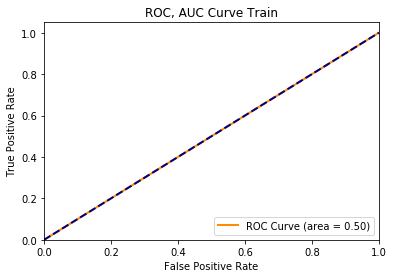

In [75]:
plt.figure()
lw = 2
plt.plot(fpr_train, tpr_train, color = 'darkorange',
        lw = lw, label = 'ROC Curve (area = %0.2f)' %metrics.auc(fpr_train, tpr_train))
plt.plot([0,1], [0,1], color = 'navy',lw = lw, linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC, AUC Curve Train')
plt.legend(loc = 'lower right')
plt.show()

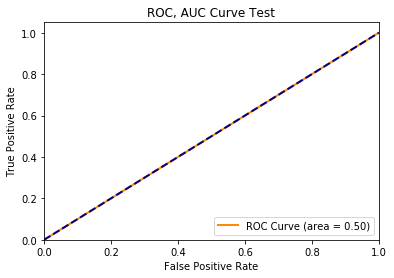

In [76]:
plt.figure()
lw = 2
plt.plot(fpr_test, tpr_test, color = 'darkorange',
        lw = lw, label = 'ROC Curve (area = %0.2f)' %metrics.auc(fpr_test, tpr_test))
plt.plot([0,1], [0,1], color = 'navy', lw = lw, linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC, AUC Curve Test')
plt.legend(loc = 'lower right')
plt.show()

## Predict Delay in December for Delay > 60

Predict 'delay > 60' using test data. We will use our **(1.8) Logistic Regression** model.

In [77]:
log_reg_train = train1.copy()
log_reg_test = test1.copy()

In [78]:
target_train = log_reg_train['delay'].apply(lambda x: 1 if x > 60 else 0)
temp_train = log_reg_train.drop(['delay', 'flag_delay', 'group_delay'], axis = 1)

target_test = log_reg_test['delay'].apply(lambda x: 1 if x > 60 else 0)
temp_test= log_reg_test.drop(['delay', 'flag_delay', 'group_delay'], axis = 1)

In [79]:
X_train = pd.get_dummies(temp_train, dummy_na = True, drop_first = True)
y_train = target_train

X_test = pd.get_dummies(temp_test, dummy_na = True, drop_first = True)
y_test = target_test

# get missing columns in the training test
miss_cols = set(X_train.columns) - set(X_test.columns )

# add a missing column in test set with default value equal to 0
for col in miss_cols:
    X_test[col] = 0
    
# ensure the order of column in the test set is in the same order than in train set
X_test = X_test[X_train.columns]

In [80]:
SC = StandardScaler()

X_train = SC.fit_transform(X_train)
X_test = SC.fit_transform(X_test)

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

y_pred_train = log_reg.predict(X_train)
y_pred_test = log_reg.predict(X_test) 

In [81]:
target_pred = y_pred_test.copy()
data_pred = temp_test.copy()

In [82]:
data_pred['delay_pred'] = target_pred

In [83]:
# show the flight in December that predicted will suffer delay > 60 minutes
display(data_pred.loc[data_pred['delay_pred'] == 1])

,airline_name,departure_airport_name,arrival_airport_name,scheduled_flight_duration_mins,scheduled_flight_duration_hours,departure_day,dep_weekend,departure_hour,delay_pred
37641,Pakistan International Airlines,Kuala Lumpur International Airport,Soekarno-Hatta International Airport,135,2.25,Wednesday,0,1,1


The model still needs improvement because it can only predict 1 flight that will suffer delay more than 60 minutes (and it is impossible).